# Linear Regression - Scikit-learn implementation

sklearn.linear_model.LinearRegression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

From the implementation point of view, this is just plain Ordinary Least Squares (scipy.linalg.lstsq) wrapped as a predictor object.

Ordinary least squares Linear Regression.

- Model initialization `regression_model = LinearRegression()`
- Fit the data(train the model) `regression_model.fit(x, y)`
- Estimated parameters: 
  - 'Slope:' `regression_model.coef_`
  - 'Intercept:' `regression_model.intercept_`

<hr style="border:2px solid gray"> </hr>

History

2020-06-16 ug

2020-12-04 ug - noise as standard deviation; resiudual plot

<hr style="border:2px solid gray"> </hr>
todo:
- confidence intervals for the parameters

### Reference:   
Linear Regression using Python (https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2)

In [ ]:
%matplotlib inline

#### imports

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### generate random data-set

numpy.random.rand  - random samples from a uniform distribution over \[0, 1)
(https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)

numpy.random.randn - Return a sample (or samples) from the “standard normal” distribution (https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)

Fixing random state for reproducibility
np.random.seed(19680801)       
from: https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/psd_demo.html#sphx-glr-gallery-lines-bars-and-markers-psd-demo-py

numpy.reshape - Gives a new shape to an array without changing its data.
https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [ ]:
np.random.seed(0)
N = 100 

# Fixing random state for reproducibility
np.random.seed(19680801)      

x = np.linspace(0,10,num=N)         # independent variable
#x = x.reshape(N,1)                 # create a second dimension -> not necessary

noise = np.random.randn(*x.shape)   # noise with gaussian distribution (standard normal distribution)

slope_true_value = 3
intercept_true_value = 2

y_true_value = intercept_true_value + slope_true_value * x          

y = y_true_value + noise            # dependent variable 

In [ ]:
x.shape, noise.shape, y.shape

In [ ]:
x.ndim, noise.ndim, y.ndim

plot

In [ ]:
plt.figure(figsize=(15,10))  # width, height
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

## Evaluating the performance of the model

### Root mean squared error(**RMSE**)

RMSE is the square root of the average of the sum of the squares of residuals.

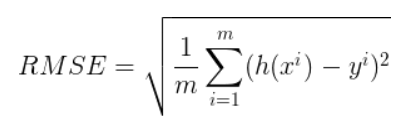

mean squared error

mse = np.sum((y_pred - y_actual)**2)

root mean squared error
m is the number of training examples

rmse = np.sqrt(mse/m)

### Coefficient of Determination(**R$^2$ score**)

**R$^2$ score** or the **coefficient of determination** explains how much the total variance of the dependent variable can be reduced by using the least square regression.
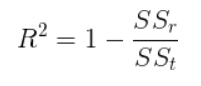

SS$_t$ is the total sum of errors if we take the mean of the observed values as the predicted value.
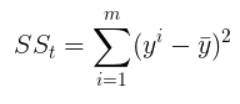

SS$_r$ is the sum of the square of residuals
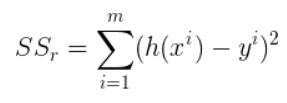

sum of square of residuals

ssr = np.sum((y_pred - y_actual)**2)

total sum of squares

sst = np.sum((y_actual - np.mean(y_actual))**2)

R2 score

r2_score = 1 - (ssr/sst)

### Scikit-learn implementation

sklearn.linear_model.LinearRegression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# Model initialization
regression_model = LinearRegression()

# we assume the data has only one axle: x.ndim = y.dim = 2 (x.shape = y.shape = (N,))

# transforming the data to include another axis
if x.ndim == 1:
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]

# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing value
print(f'Slope: {regression_model.coef_}, (true_value: {slope_true_value})')
print(f'Intercept: {regression_model.intercept_}, (true_value: {intercept_true_value})')
print(f'Root mean squared error: {rmse}')
print(f'R2 score: {r2}')


### Plot the values

matplotlib.pyplot.scatter - A scatter plot of y vs. x with varying marker size and/or color.
https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html

parmeter `s` : float or array-like, shape (n, ), optional
The marker size in points**2. 


In [ ]:
# plotting values
plt.figure(figsize=(15,10))  # width, height

# data points
plt.subplot(211)
plt.scatter(x, y, s=10, label='data point')
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_true_value, color='b',label='y_true_value')
plt.plot(x, y_predicted, color='r',label='y_predicted')

plt.grid(True)
plt.legend()


# residuals
plt.subplot(212)

plt.plot(x, noise, marker='.', linestyle='-',color='b',label='original noise')
plt.plot(x, y-y_predicted, marker='.', linestyle='-',color='r',label='y residuals')


plt.grid(True)
plt.legend()
